#**project 3**
#Title:Social Media Sentiments Analysis

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset

data = pd.read_csv("/content/sentimentdataset.csv")

In [5]:
# basic analysis

data.head(60)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [6]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [7]:
print(len(data))

732


In [8]:
data=data.drop_duplicates()
print("After removing the duplicates values:",len(data))

After removing the duplicates values: 732


In [9]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [14]:
# find the null values in dataset
data.isna()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [17]:
data.isna().any()


,0
Unnamed: 0.1,False
Unnamed: 0,False
Text,False
Sentiment,False
Timestamp,False
User,False
Platform,False
Hashtags,False
Retweets,False
Likes,False


#1) What is the overall distribution of sentiments (positive, negative, neutral) across the posts?

In [18]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [20]:
df1 = data[["Sentiment"]].value_counts().reset_index(name = "Distribution")
df2 = df1.head(30)
df2

,Sentiment,Distribution
0,Positive,44
1,Joy,42
2,Excitement,32
3,Happy,14
4,Contentment,14
5,Neutral,14
6,Gratitude,9
7,Sad,9
8,Hopeful,9
9,Curiosity,8


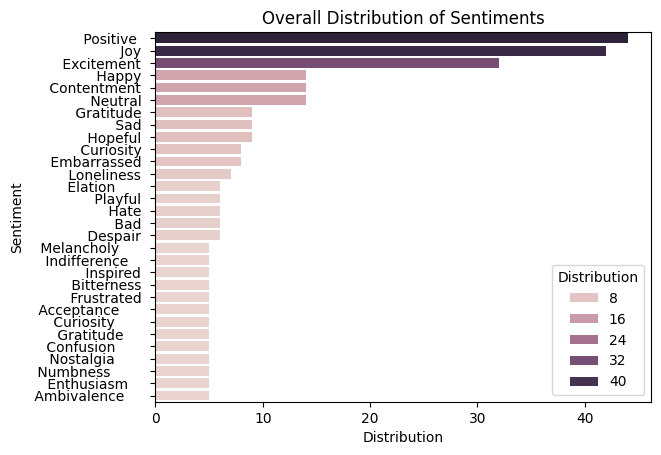

In [21]:
sns.barplot(data = df2,x = "Distribution",y = "Sentiment",hue = "Distribution")
plt.title("Overall Distribution of Sentiments")
plt.show()

#2) Which platform generates the most engagement in terms of likes and retweets?

In [22]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/sentimentdataset.csv'
data = pd.read_csv(file_path)

data['Platform'].value_counts()


In [37]:
data['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


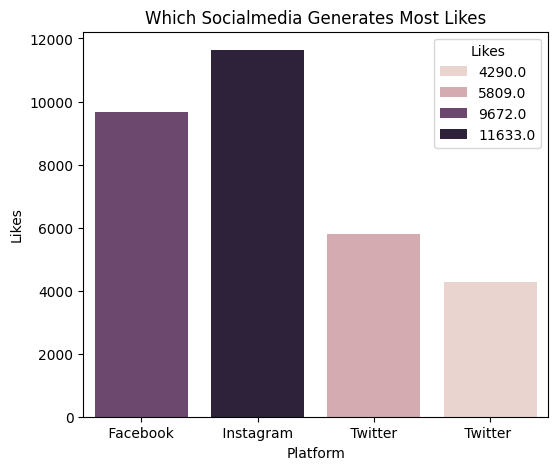

In [45]:
plt.figure(figsize = (6,5))
sns.barplot(data = df1,x = "Platform",y = "Likes",hue = "Likes")
plt.title("Which Socialmedia Generates Most Likes")
plt.show()

In [46]:
df2 = data.groupby('Platform')[['Retweets']].sum().reset_index()
df2

,Platform,Retweets
0,Facebook,4844.0
1,Instagram,5831.0
2,Twitter,2918.0
3,Twitter,2151.0


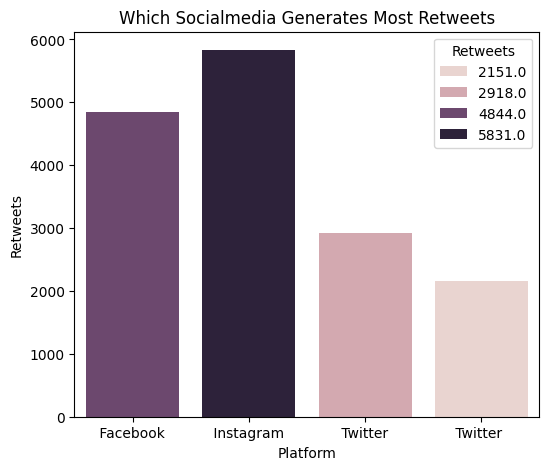

In [47]:
plt.figure(figsize = (6,5))
sns.barplot(data=df2,x = "Platform",y = "Retweets",hue = "Retweets")
plt.title("Which Socialmedia Generates Most Retweets")
plt.show()

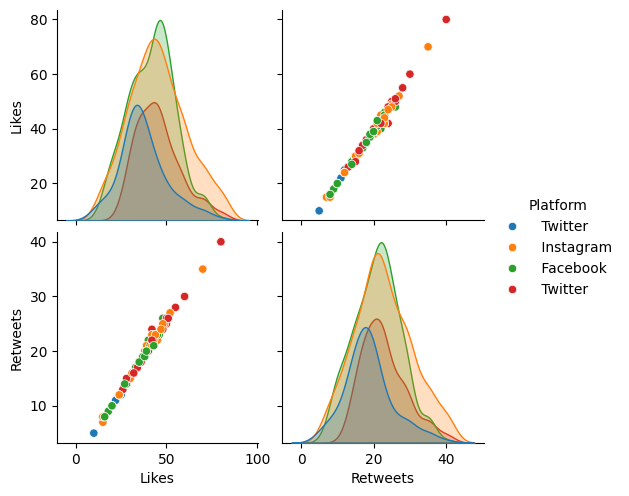

In [48]:
sns.pairplot(data[['Platform', 'Likes', 'Retweets']],hue = "Platform")
plt.show()

#3) Which users have the highest average engagement (likes and retweets per post)?


In [49]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [61]:

df = pd.read_csv('/content/sentimentdataset.csv')



In [79]:
df1 = data.groupby("User")["Likes"].sum().reset_index()
df1

,User,Likes
0,AbyssOfTime,45.0
1,AcceptanceSeeker,30.0
2,AdeleConcertGoer,80.0
3,AdeleMelodyTearjerker,60.0
4,AdventureAwaits,40.0
...,...,...
680,YearbookExplorer,25.0
681,ZenLifestyle,30.0
682,ZenMaster,30.0
683,ZenMaster2,35.0


In [80]:
df2 = df1.head(10)
df2

,User,Likes
0,AbyssOfTime,45.0
1,AcceptanceSeeker,30.0
2,AdeleConcertGoer,80.0
3,AdeleMelodyTearjerker,60.0
4,AdventureAwaits,40.0
5,AdventureAwaits,40.0
6,AdventureSeeker,35.0
7,AdventureX,15.0
8,AffectionSender,30.0
9,AloofObserver,20.0


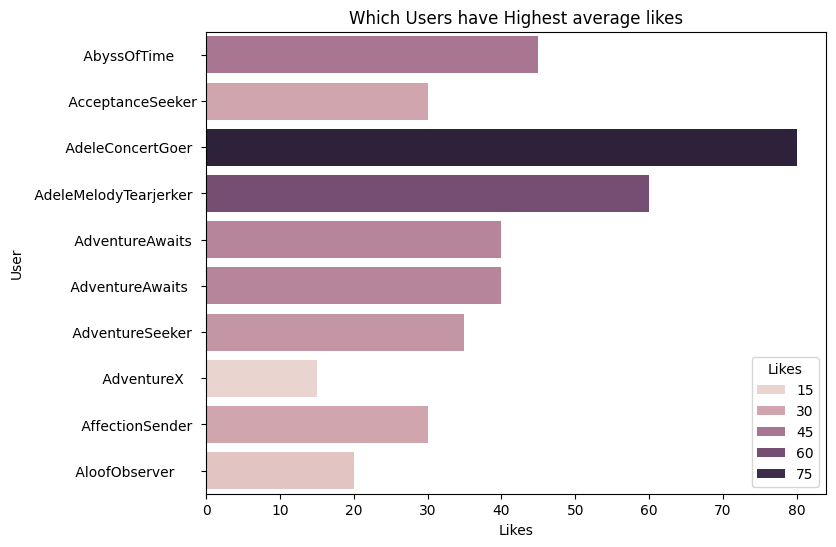

In [81]:
plt.figure(figsize = (8,6))
sns.barplot(data=df2,x = "Likes",y = "User",hue = "Likes")
plt.title("Which Users have Highest average likes")
plt.show()

In [82]:
df1 = data.groupby("User")["Retweets"].sum().reset_index()
df1

,User,Retweets
0,AbyssOfTime,22.0
1,AcceptanceSeeker,15.0
2,AdeleConcertGoer,40.0
3,AdeleMelodyTearjerker,30.0
4,AdventureAwaits,20.0
...,...,...
680,YearbookExplorer,12.0
681,ZenLifestyle,15.0
682,ZenMaster,15.0
683,ZenMaster2,18.0


In [83]:
df2 = df1.head(10)
df2

,User,Retweets
0,AbyssOfTime,22.0
1,AcceptanceSeeker,15.0
2,AdeleConcertGoer,40.0
3,AdeleMelodyTearjerker,30.0
4,AdventureAwaits,20.0
5,AdventureAwaits,20.0
6,AdventureSeeker,18.0
7,AdventureX,8.0
8,AffectionSender,15.0
9,AloofObserver,10.0


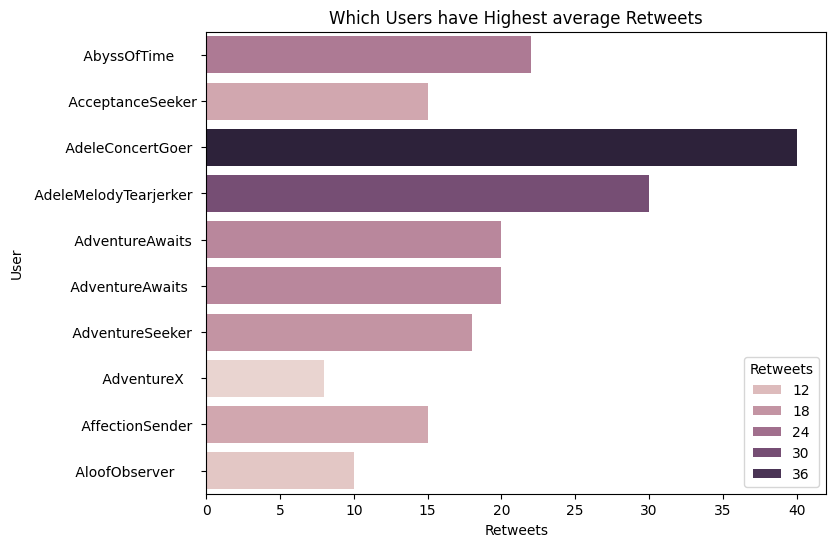

In [84]:
plt.figure(figsize = (8,6))
sns.barplot(data = df2,x = "Retweets",y = "User",hue = "Retweets")
plt.title("Which Users have Highest average Retweets")
plt.show()

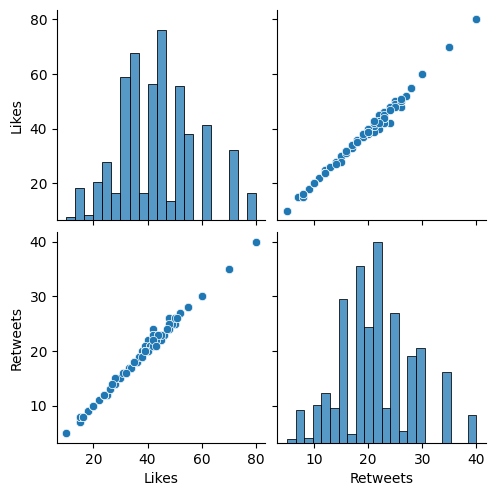

In [85]:
sns.pairplot(data[['User', 'Likes', 'Retweets']])
plt.show()